In [3]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import seaborn as sns

sns.set(rc={"figure.figsize": (9, 5)})
sns.set_style("whitegrid")

In [4]:
def get_year_data_dt(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = year

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]
    
    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures.columns = pd.date_range(start='2014-01-06', end='2014-12-29', freq='W-MON')
    df_cultures['yield'] = yield_by_culture
    return df_cultures

In [5]:
def get_year_data_ind(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]

    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures = df_cultures[df_cultures.columns[:52]]
    df_cultures.columns = range(1, 53)
    df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    
    return df_cultures

In [6]:
def get_mean_week_ndvi():
    FILE = '../Сводная вегетация.xlsx'
    df_list = []
    for i in range(2012,2016):
        SHEET = str(i)

        df = pd.read_excel(FILE, sheetname=SHEET, header=1)
        NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
        CULTURE_COLUMN = 'Культура ' + SHEET

        df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
        df_cultures = df_cultures[NDVI_COLUMNS]

        df_cultures = df_cultures[df_cultures.columns[::-1]]
        df_cultures = df_cultures[df_cultures.columns[:52]]
        df_cultures.columns = range(1, 53)
        df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
        df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
        
        df_list.append(df_cultures)
    
    return df_list

In [7]:
def culture_year_ndvi(year, culture):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)
    culture = culture
    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    #NDVI_COLUMNS = [x for x in NDVI_COLUMNS if x <='неделя 51']
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df[df[CULTURE_COLUMN] == culture]
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]

    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures = df_cultures[df_cultures.columns[:52]]
    df_cultures.columns = pd.date_range(start=SHEET+'-01-03', end=SHEET+'-12-31', freq='W-MON')
    df_cultures['yield'] = yield_by_culture
    df_cultures = df_cultures.reset_index()
    
    return df_cultures

In [8]:
#generate every year data for sunflower
# for i in range(2012,2016):
#     df=culture_year_ndvi(i, 'Подсолнечник')
#     df.to_csv('Sunflower_'+str(i)+'.csv')

In [9]:
def whole_data_culture_ndvi():
    p = pd.Panel({n: df for n, df in enumerate(get_mean_week_ndvi())})
    p = p.mean(axis=0)
    return p

In [11]:
def plot_ndvi(culture, year):
    df = get_year_data_ind(2012)
    yt = df.loc[culture].values
    xt = range(1, 53)
    
    plt.plot(xt, yt)

/home/yura/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  after removing the cwd from sys.path.


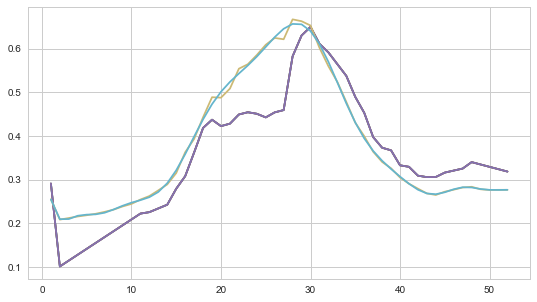

In [17]:
for i in range(2012, 2016):
    plot_ndvi('Кукуруза', i)

df = whole_data_culture_ndvi()
yt = df.loc['Кукуруза'].values
xt = range(1, 53)
plt.plot(xt, yt)
coeff = poly.polyfit(x=xt, y=yt, deg=18)
x_new = np.linspace(xt[0], xt[-1], num=len(xt))
ffit = poly.polyval(x_new, coeff)
plt.plot(x_new, ffit)